# Importando dados

In [1]:
import pandas as pd

exames = pd.read_csv('exames.csv')
exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


# Separando dados com train_test_split

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 123123

np.random.seed(SEED)

x = exames.drop(['id', 'diagnostico', 'exame_33', 'exame_4', 'exame_29'], axis = 1)
y = exames.diagnostico

treinox, testex, treinoy, testey = train_test_split(x, y, test_size=0.3)

# Criando modelo de classificação

In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(treinox, treinoy)

RandomForestClassifier()

# Testando modelo de classificação

In [4]:
accuracy = model.score(testex, testey)

print('A acurâcia total do modelo foi de %.2f%%' % (accuracy * 100))

A acurâcia total do modelo foi de 95.32%


# Utilizando o DummyClassifier

## Criando o modelo Dummy

In [5]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')

dummy.fit(treinox, treinoy)

DummyClassifier(strategy='most_frequent')

## Testando o modelo Dummy

In [6]:
accuracy_dummy = dummy.score(testex, testey)

print('A acurâcia total do modelo dummy foi de %.2f%%' % (accuracy_dummy * 100))

A acurâcia total do modelo dummy foi de 66.67%


# Avançando na exploração de dados 

## Tratando dados para plotagem

In [7]:
from sklearn.preprocessing import StandardScaler

processador = StandardScaler()

processador.fit(x)
x2 = processador.transform(x)

x2 = pd.DataFrame(data = x2, columns= x.keys())

In [8]:
dados_concatenados = pd.concat([y, x2.iloc[:, :10]], axis = 1)

dados_plotaveis = pd.melt(dados_concatenados, id_vars='diagnostico', var_name='exames', value_name='valores')

## Plotando o primeiro gráfico de violino

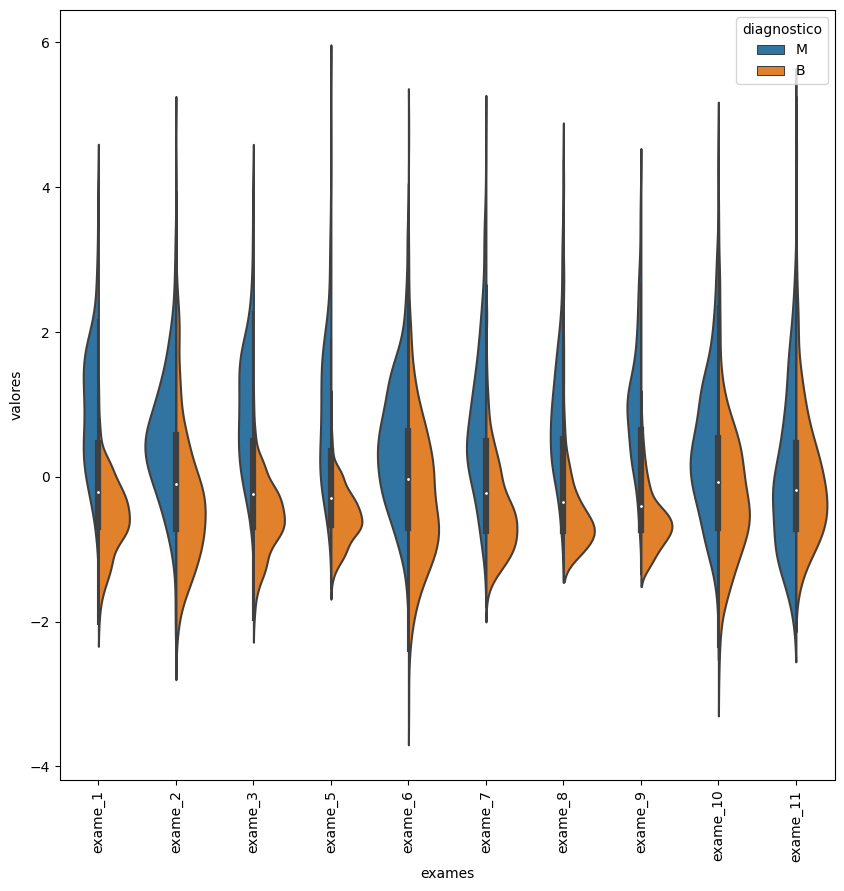

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

sns.violinplot(x = 'exames', y = 'valores', data = dados_plotaveis, hue = 'diagnostico', split = True)

plt.xticks(rotation = 90);

## Separando gráficos de violino

In [10]:
def plotar_violino(inicio, fim):
    dados_concatenados = pd.concat([y, x2.iloc[:, inicio:fim]], axis = 1)
    dados_plotaveis = pd.melt(dados_concatenados, id_vars='diagnostico', var_name='exames', value_name='valores')
    
    plt.figure(figsize=(10, 10))

    sns.violinplot(x = 'exames', y = 'valores', data = dados_plotaveis, hue = 'diagnostico', split = True)

    plt.xticks(rotation = 90);

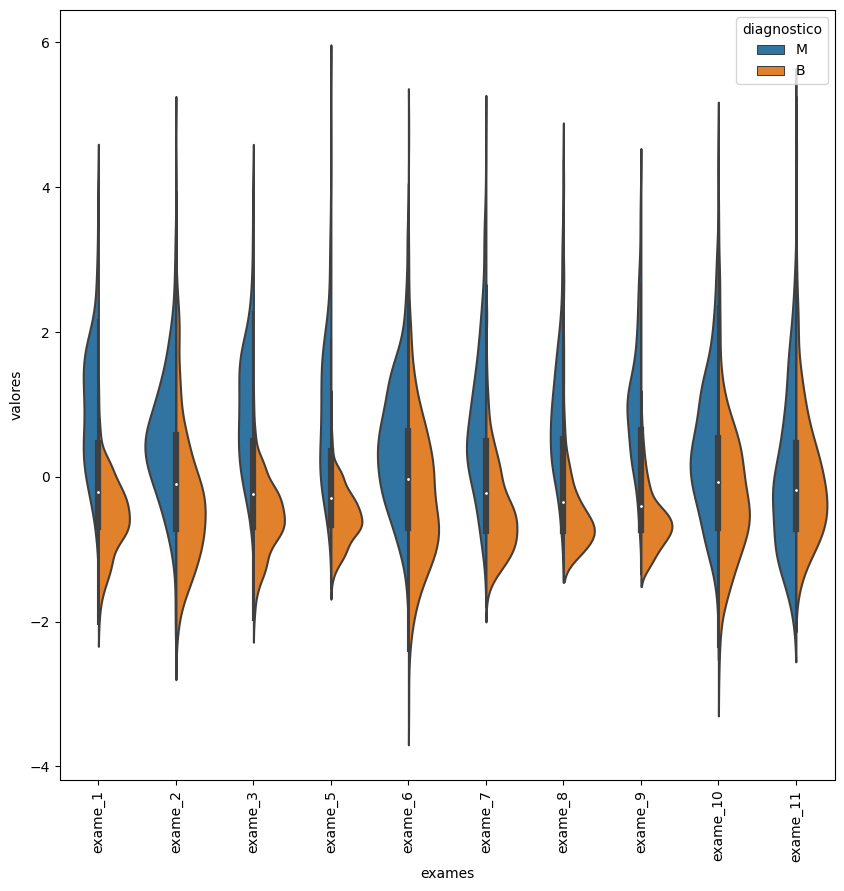

In [11]:
plotar_violino(0, 10)

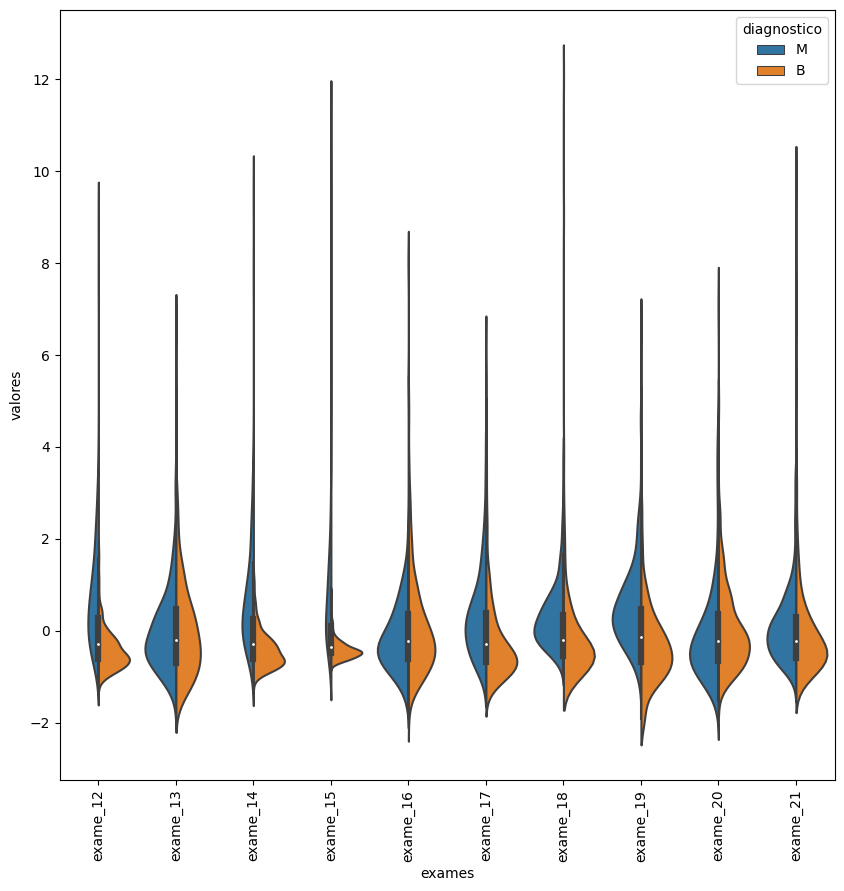

In [12]:
plotar_violino(10, 20)

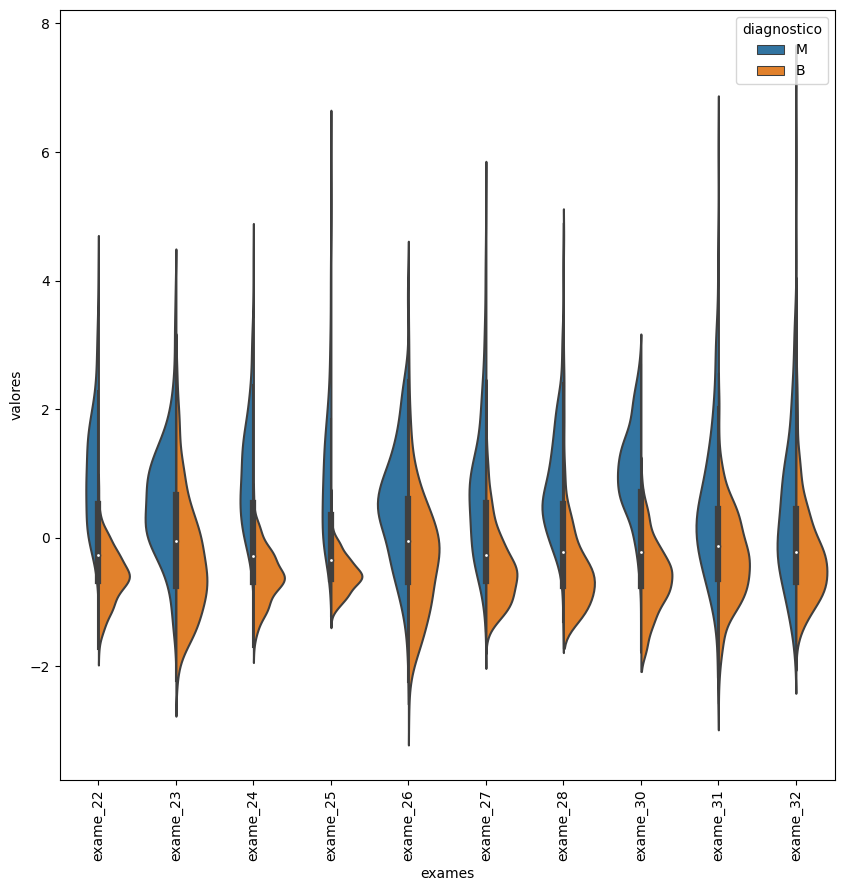

In [13]:
plotar_violino(20, 30)

# Dados correlacionados

## Plotando mapa de calor

<AxesSubplot:>

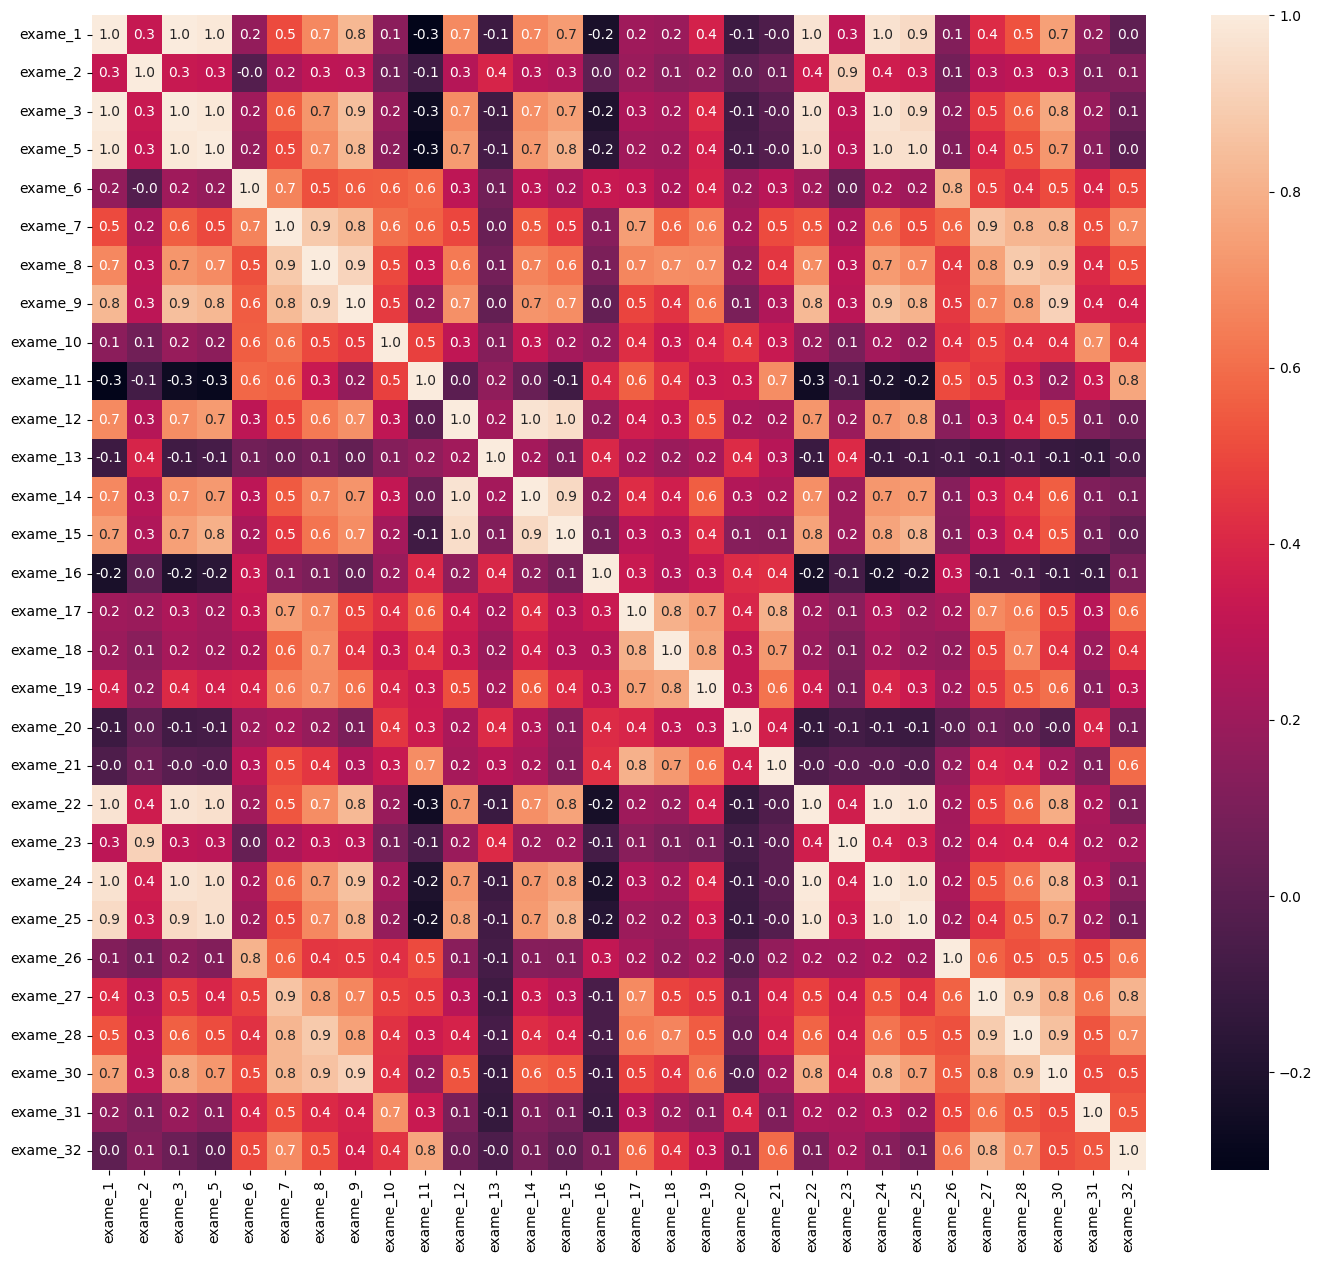

In [14]:
matriz = x2.corr()

plt.figure(figsize=(17, 15))

sns.heatmap(matriz, annot = True, fmt = '.1f')

## Explorando variáveis correlacionadas

In [15]:
correlacoes_de_valores = matriz[matriz > 0.99].sum()

correlacoes_de_valores = correlacoes_de_valores[correlacoes_de_valores > 1]

correlacoes_de_valores

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [16]:
matriz2 = matriz.drop(['exame_3', 'exame_24'], axis = 1)

<AxesSubplot:>

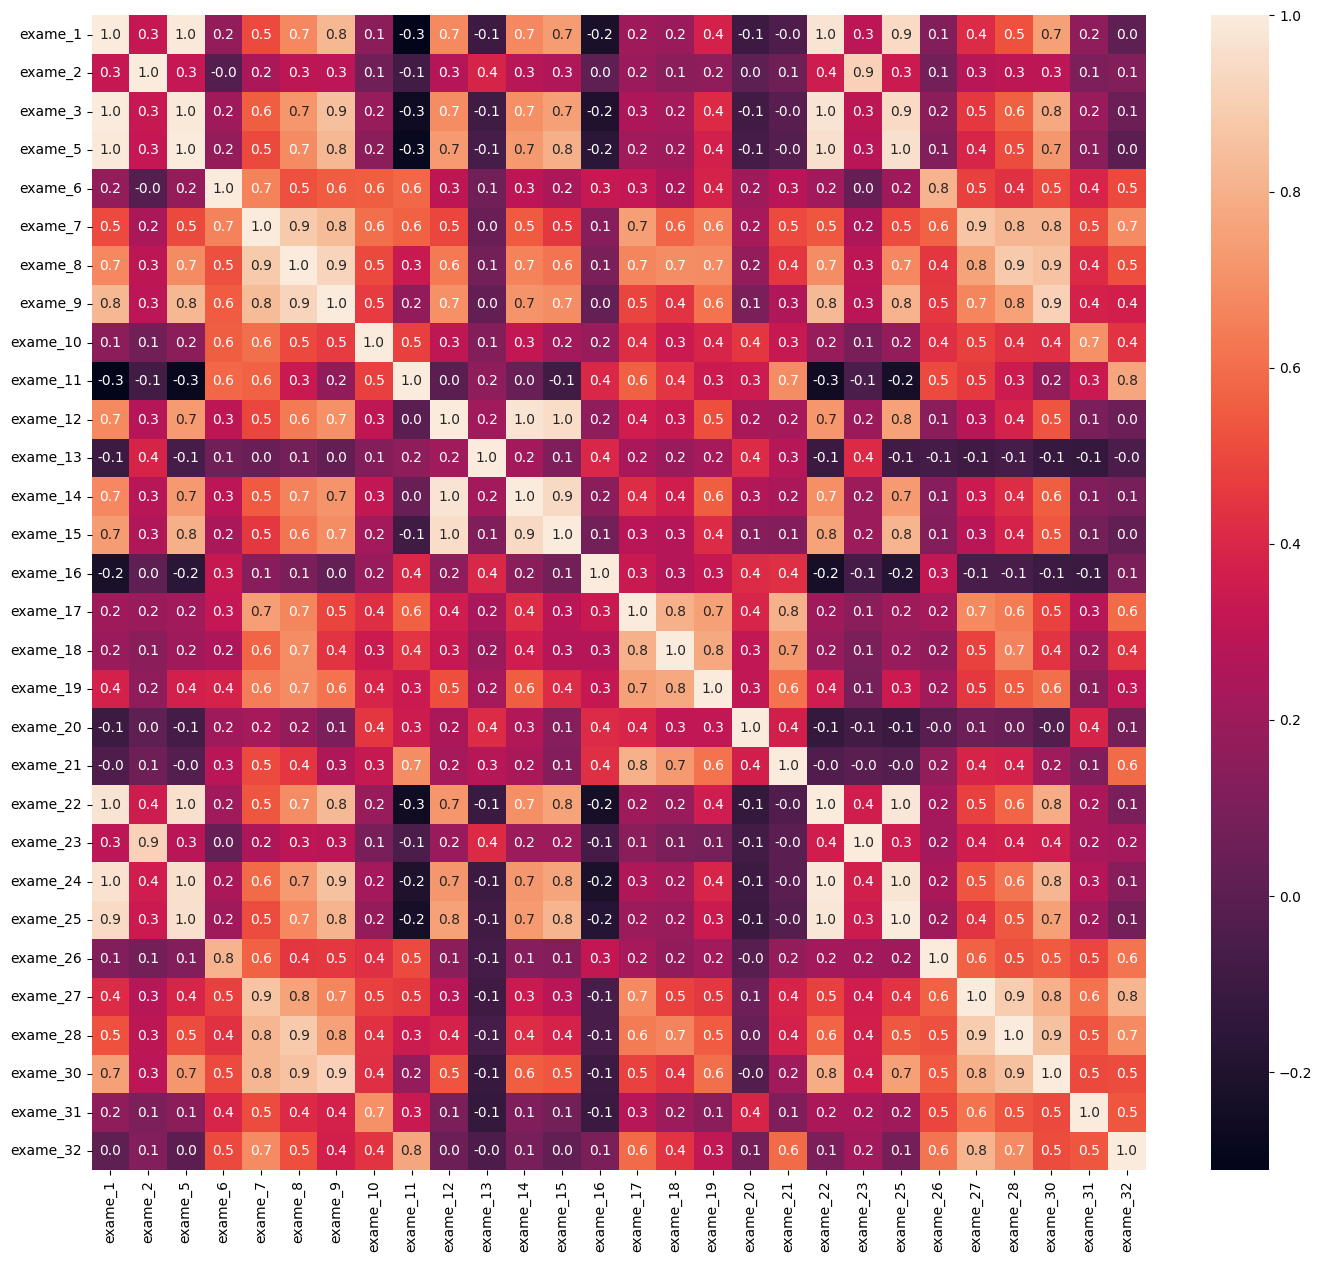

In [17]:
plt.figure(figsize=(17, 15))

sns.heatmap(matriz2, annot = True, fmt = '.1f')

# Automatizando a seleção

## Diminuindo o tamanho da matriz e testando modelo

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bests_k = SelectKBest(chi2, k = 5)

In [19]:
x3 = x.drop(columns=['exame_3', 'exame_24'])

treinox, testex, treinoy, testey = train_test_split(x3, y, test_size=0.3)

bests_k.fit(treinox, treinoy)
treino_kbest = bests_k.transform(treinox)
teste_kbest = bests_k.transform(testex)

In [20]:
model = RandomForestClassifier(n_estimators=100)
model.fit(treino_kbest, treinoy)

accuracy = model.score(teste_kbest, testey)

print('A acurâcia total do modelo foi de %.2f%%' % (accuracy * 100))

A acurâcia total do modelo foi de 90.06%


## Matriz de confusão

In [21]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(testey, model.predict(teste_kbest))

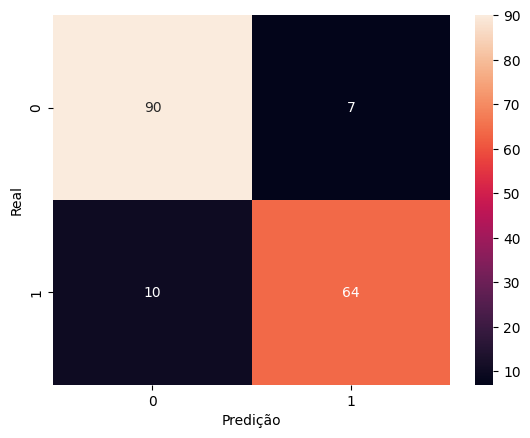

In [22]:
sns.heatmap(matriz_confusao, annot = True, fmt='d').set(xlabel = 'Predição', ylabel = 'Real');